In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: Read dataset from drive, 'Dataset_SDP.csv'

import pandas as pd
import io

df = pd.read_csv('/content/drive/My Drive/ML SDP Project Items/SpamTextCSV.csv') # Assuming the file is in your MyDrive
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939 entries, 0 to 5938
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5939 non-null   object
 1   Message   5939 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


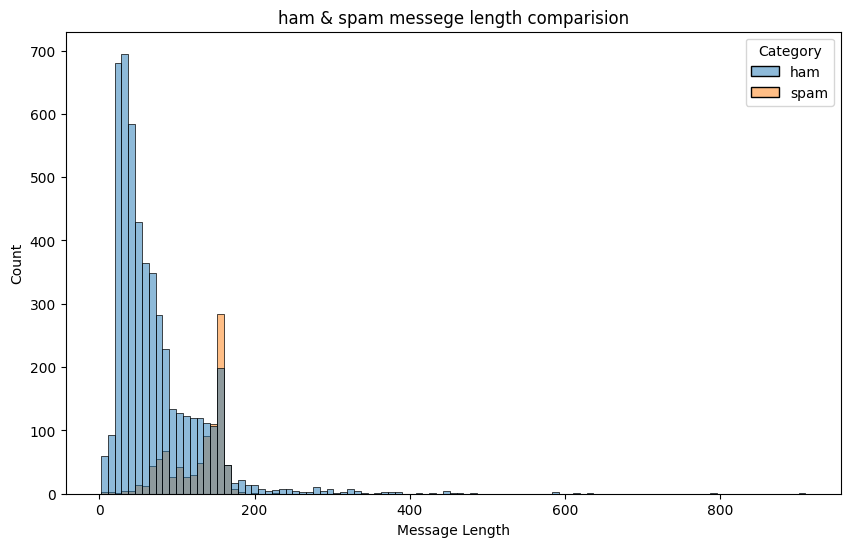

In [ ]:
#extra column indicating length of message
df["Message Length"]=df["Message"].apply(len)

#figure
fig=plt.figure(figsize=(10,6))
sns.histplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [ ]:
ham_desc = df[df["Category"]=="ham"]["Message Length"].describe()
spam_desc = df[df["Category"]=="spam"]["Message Length"].describe()
print("Ham Message Length Stats")
print(ham_desc)
print("Spam Message Length Stats")
print(spam_desc)

Ham Message Length Stats
count    5015.000000
mean       71.207976
std        57.037074
min         2.000000
25%        34.000000
50%        54.000000
75%        90.000000
max       910.000000
Name: Message Length, dtype: float64
Spam Message Length Stats
count    924.000000
mean     127.110390
std       35.444228
min        7.000000
25%       97.000000
50%      143.000000
75%      156.000000
max      223.000000
Name: Message Length, dtype: float64


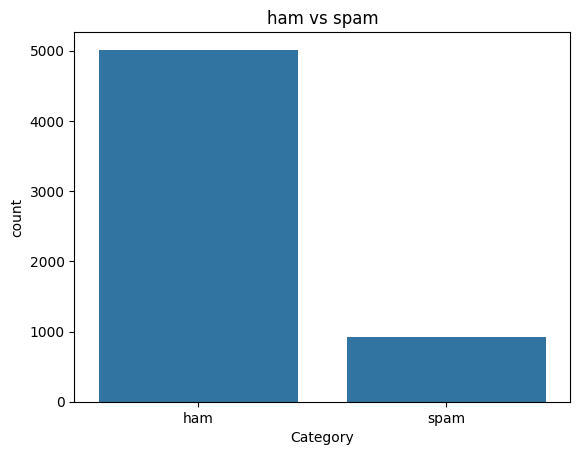

In [ ]:
df["Category"].value_counts()
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [ ]:
ham_count=df["Category"].value_counts()[0]
spam_count=df["Category"].value_counts()[1]

total_count=df.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:84.44% of total data.
Spam contains:15.56% of total data.


<ipython-input-5-000c1ae6ed20>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ham_count=df["Category"].value_counts()[0]
<ipython-input-5-000c1ae6ed20>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spam_count=df["Category"].value_counts()[1]


undersampling , due to imbalanced dataset

In [ ]:
import numpy as np
#compute the length of majority & minority class
minority_len=len(df[df["Category"]=="spam"])
majority_len=len(df[df["Category"]=="ham"])

#store the indices of majority and minority class
minority_indices=df[df["Category"]=="spam"].index
majority_indices=df[df["Category"]=="ham"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

# print(undersampled_indices)
#create df using new indices
data=df.loc[undersampled_indices]

#shuffle the sample
data=data.sample(frac=1)

#reset the index as its all mixed
data=data.reset_index()

#drop the older index
data=data.drop(
    columns=["index"],
)

In [ ]:
data.shape
data["Category"].value_counts()

,count
Category,
spam,924
ham,924


In [ ]:
data.head()

,Category,Message,Message Length
0,spam,TBS/PERSOLVO. been chasing us since Sept for£3...,140
1,spam,Special offer: Get a $500 shopping voucher jus...,63
2,ham,Ok no problem... Yup i'm going to sch at 4 if ...,64
3,ham,Our ride equally uneventful - not too many of ...,99
4,spam,Update_Now - 12Mths Half Price Orange line ren...,110


In [ ]:
data.shape

(1848, 3)

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
#declare empty list to store tokenized message
corpus=[]

#iterate through the data["Message"]
for message in data["Message"]:

    #replace every special characters, numbers etc.. with whitespace of message
    #It will help retain only letter/alphabets
    message=re.sub("[^a-zA-Z]"," ",message)

    #convert every letters to its lowercase
    message=message.lower()

    #split the word into individual word list
    message=message.split()

    #perform stemming using PorterStemmer for all non-english-stopwords
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    #join the word lists with the whitespace
    message=" ".join(message)

    #append the message in corpus list
    corpus.append(message)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000
# The one_hot function converts the word into a numerical
# vector representation. In one-hot encoding, each word is
# represented by a vector of size vocab_size, where all
# elements are 0 except for the element corresponding to the
# word's index in the vocabulary, which is set to 1.
oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [ ]:
data["Message Length"].describe()

,Message Length
count,1848.000000
mean,99.293831
std,55.350111
min,2.000000
25%,51.000000
50%,94.000000
75%,149.000000
max,482.000000


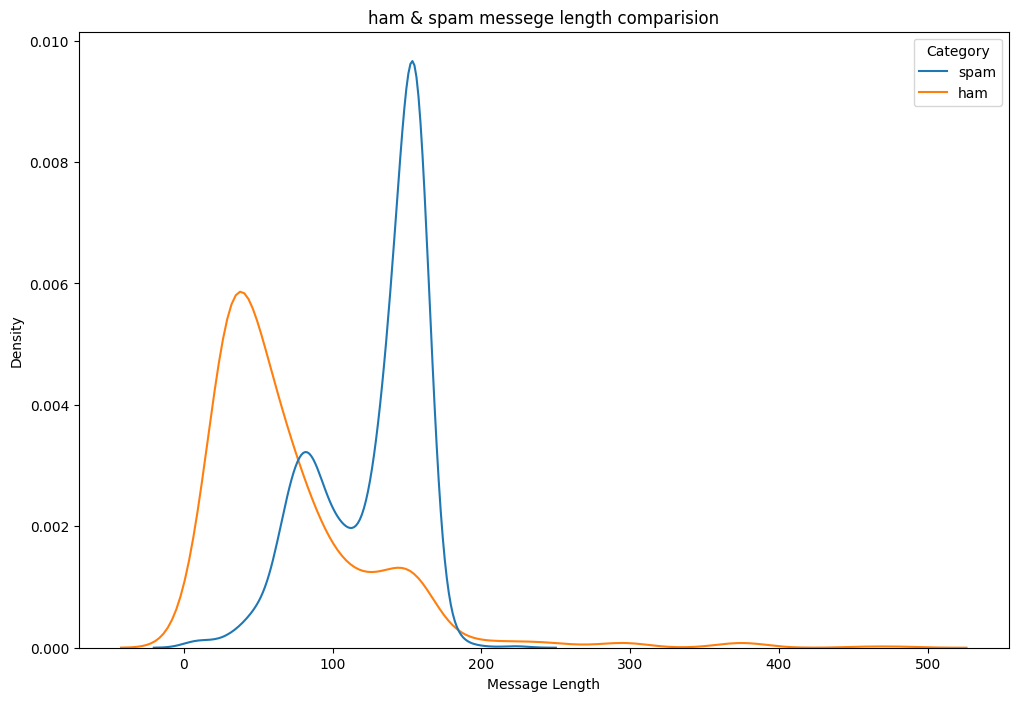

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()


Spam messages are lengthier than ham (on an average : from 0 to 200)


After one_hot we will then perform word embedding

The resulting list of one_hot will contain uneven indices length because of uneven length of tokenized words in the corpus.

To perform word embedding we have to consider a sentence length and hence to define a fixed sentence length for our dataset we will try to visualize and understand the patterns of Messege length of dataset.



*   Padding: Adding padding tokens to shorter documents to make them the same length as the longest document.




In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [ ]:
data["Label"]=data["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [ ]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=data["Label"]

In [ ]:
data.head()

,Category,Message,Message Length,Label
0,spam,"Thanks for your ringtone order, ref number K71...",156,1
1,spam,CDs 4u: Congratulations ur awarded £500 of CD ...,165,1
2,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...,142,1
3,ham,Will ü b going to esplanade fr home?,36,0
4,ham,Where do you need to go to get it?,34,0


In [ ]:
df_final=pd.concat([extract_features,target],axis=1)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,8543,5502,5868,3134,1749,1721,6116,4545,2381,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2151,859,8932,9949,4396,8183,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,4929,5296,3266,2204,67,791,1124,0
3,0,0,0,0,0,0,0,0,0,0,...,5843,662,7629,4070,7828,9748,7766,1586,5226,0
4,0,0,0,0,0,0,0,0,0,0,...,2476,6794,8000,3257,4177,3257,3742,3065,745,1


from matplotlib import pyplot as plt
_df_0[186].plot(kind='hist', bins=20, title=186)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[187].plot(kind='hist', bins=20, title=187)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[188].plot(kind='hist', bins=20, title=188)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[189].plot(kind='hist', bins=20, title=189)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=186, y=187, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=187, y=188, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=188, y=189, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=189, y=190, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[187]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(187)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[188]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(188)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[189]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(189)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[190]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(190)

from matplotlib import pyplot as plt
_df_12[186].plot(kind='line', figsize=(8, 4), title=186)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[187].plot(kind='line', figsize=(8, 4), title=187)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[188].plot(kind='line', figsize=(8, 4), title=188)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[189].plot(kind='line', figsize=(8, 4), title=189)
plt.gca().spines[['top', 'right']].set_visible(False)

above numbers are indices of words in vocab

In [ ]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [ ]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)

#trainval: training and validation (85%) and testing (15%)

In [ ]:
#85% training and 15% validation from above split
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=a5133bc64fe23fb0a1d6b25b5fcadf328baa35e3fa071fde20b0df1c13eaf226
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from keras_self_attention import SeqSelfAttention

model=Sequential()

feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128,
    return_sequences=True
    )
)
model.add(SeqSelfAttention(attention_activation='tanh'))
model.add(
    LSTM(units=64)  # Add another LSTM layer to process the attention output
)
model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


model.add(Embedding(...)): This adds an embedding layer to your model. The embedding layer is responsible for converting word indices into dense vector representations (word embeddings). It takes the following arguments:
* **input_dim**=vocab_size: This specifies the size of your
  vocabulary (the total number of unique words you're considering).
* **output_dim**=feature_num: This sets the dimensionality of the
  word embeddings (how many numbers are used to represent each word). In this case, you've chosen 100, meaning each word will be represented by a vector of 100 numbers.
* **input_length**=sentence_len: This defines the length of the input sequences (your padded documents). You've set this to sentence_len, which was likely 200 in your previous code.


### How it works?

Let's say your input_length is 200 and output_dim is 100. For each document in your input data, the Embedding layer will:

1. Take the list of word indices representing the document 2. (padded to length 200).
2. Convert each word index to a 100-dimensional embedding vector.
Arrange these embedding vectors into a matrix of shape **(200, 100).**
3. This matrix is then passed to the next layer in your model (the LSTM layer in your case) for further processing.

**Input**: Your model takes a batch of documents as input, where each document is represented by a sequence of word indices (padded to length sentence_len).

**Embedding** **Layer**: This layer transforms the word indices into dense vector representations (embeddings) of dimension feature_num. The output is a 3D tensor where each document is represented by a sequence of embedding vectors.

**LSTM Layer**: This layer processes the sequence of embeddings, capturing temporal relationships between words. It outputs a 2D tensor where each document is represented by a single vector of dimension *units*.

**Dense Layer**: This layer takes the output of the LSTM and makes a prediction. It outputs a single value for each document, representing the probability of belonging to a particular class.


If you have a batch size of 32, sentence_len of 200, feature_num of 100, and units of 128, the dimensions would be:

* Input: (32, 200)
* Embedding Layer Output: (32, 200, 100)
* LSTM Layer Output: (32, 128)
* Dense Layer Output: (32, 1)





In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5142 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5757 - loss: 0.6431 - val_accuracy: 0.9153 - val_loss: 0.2082
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9494 - loss: 0.1655 - val_accuracy: 0.9407 - val_loss: 0.1956
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9765 - loss: 0.1036 - val_accuracy: 0.9492 - val_loss: 0.2240
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9849 - loss: 0.0636 - val_accuracy: 0.9534 - val_loss: 0.1997
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9850 - loss: 0.0515 - val_accuracy: 0.9534 - val_loss: 0.2095
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9918 - loss: 0.0318 - val_accuracy: 0.9407 - val_loss: 0.1478
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9964 - loss: 0.0292 - val_accuracy: 0.9449 - val_loss:

1) Word Embeddings


In [ ]:
# Extract weights from the embedding layer
embedding_layer = model.layers[0]  # First layer is the embedding layer
embedding_weights = embedding_layer.get_weights()[0]  # Shape: (vocab_size, feature_num)


In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_weights)

In [ ]:
# Assuming `corpus` contains preprocessed messages
unique_words = list(set(" ".join(corpus).split()))
word_to_index = {word: idx for idx, word in enumerate(unique_words)}
index_to_word = {idx: word for word, idx in word_to_index.items()}


In [ ]:
import pandas as pd

# Get the actual vocabulary size
vocab_size_actual = len(index_to_word)

# Create a DataFrame with reduced embeddings and corresponding words
embedding_df = pd.DataFrame({
    "x": reduced_embeddings[:vocab_size_actual, 0],
    "y": reduced_embeddings[:vocab_size_actual, 1],
    "word": list(index_to_word.values())
})

# Save as CSV or JSON for the frontend
embedding_df.to_csv("word_embeddings.csv", index=False)

2) Attention layer Mechanism

In [ ]:
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Define input
input_layer = Input(shape=(sentence_len,))

# Embedding
embedding = Embedding(
    input_dim=vocab_size,
    output_dim=feature_num,
    input_length=sentence_len
)(input_layer)

# LSTM + Self-Attention
lstm1, hidden_states, cell_states = LSTM(units=128, return_sequences=True, return_state=True)(embedding)
attention, attention_weights = SeqSelfAttention(
    attention_activation="tanh",
    return_attention=True
)(lstm1)

# Process the attention output
lstm2 = LSTM(units=64)(attention)

# Output layer
output = Dense(units=1, activation="sigmoid")(lstm2)

# Final model
model = Model(inputs=input_layer, outputs=output)

# Create attention extraction model
attention_extraction_model = Model(inputs=input_layer, outputs=attention_weights)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4689 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5258 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6134 - loss: 0.6203 - val_accuracy: 0.8941 - val_loss: 0.2928
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9555 - loss: 0.1574 - val_accuracy: 0.9492 - val_loss: 0.1252
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9844 - loss: 0.0543 - val_accuracy: 0.9407 - val_loss: 0.1339
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9890 - loss: 0.0544 - val_accuracy: 0.9449 - val_loss: 0.1923
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9829 - loss: 0.0813 - val_accuracy: 0.9449 - val_loss: 0.1793
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9900 - loss: 0.0478 - val_accuracy: 0.9364 - val_loss:

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ [(None, 200, 128), (None,   │         117,248 │
│                                      │ 128), (None, 128)]          │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ seq_self_attention_1                 │ [(None, 200, 128), (None,   │           8,257 │
│ (SeqSelfAttention)                   │ 200, 200)]                  │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,524,936 (13.45 MB)

 Trainable params: 1,174,978 (4.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,349,958 (8.96 MB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example sentence
example_sentence = ["this", "is", "a", "spam", "message"]
processed_sentence = pad_sequences(
    [one_hot(" ".join(example_sentence), vocab_size)],
    maxlen=sentence_len,
    padding="pre"
)

# Extract attention weights
attention_weights = attention_extraction_model.predict(processed_sentence)

# Reshape to match the input shape (1, sentence_len)
attention_weights = attention_weights.squeeze()

# Normalize attention weights (optional)
attention_weights /= attention_weights.sum(axis=1, keepdims=True)
print(attention_weights.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(200, 200)


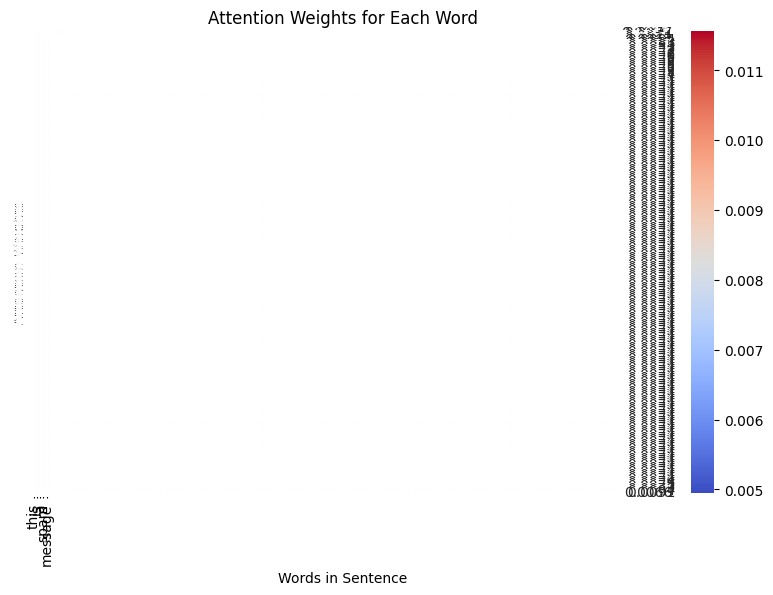

In [ ]:
# Visualization with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(attention_weights, annot=True, cmap="coolwarm", cbar=True, xticklabels=example_sentence, yticklabels=False)
plt.title("Attention Weights for Each Word")
plt.xlabel("Words in Sentence")
plt.ylabel("Attention Weights")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (5,) and (200,)

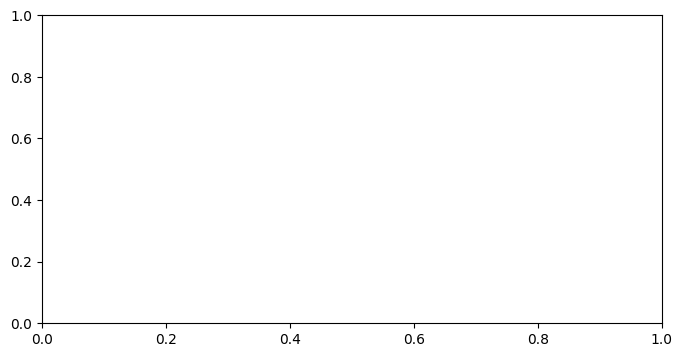

In [ ]:
# Visualization with line plot
plt.figure(figsize=(8, 4))
plt.plot(range(len(example_sentence)), attention_weights[0], marker='o', label="Attention Weights")
plt.xticks(range(len(example_sentence)), example_sentence, rotation=45)
plt.title("Attention Weights Across Words")
plt.xlabel("Words")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ seq_self_attention                   │ (None, 200, 128)            │           8,257 │
│ (SeqSelfAttention)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,524,936 (13.45 MB)

 Trainable params: 1,174,978 (4.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,349,958 (8.96 MB)

In [ ]:
import joblib
attention_extraction_model.save('attention_model.keras')


In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 563ms/step


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:93.53%


array([[136,   4],
       [  8, 130]])

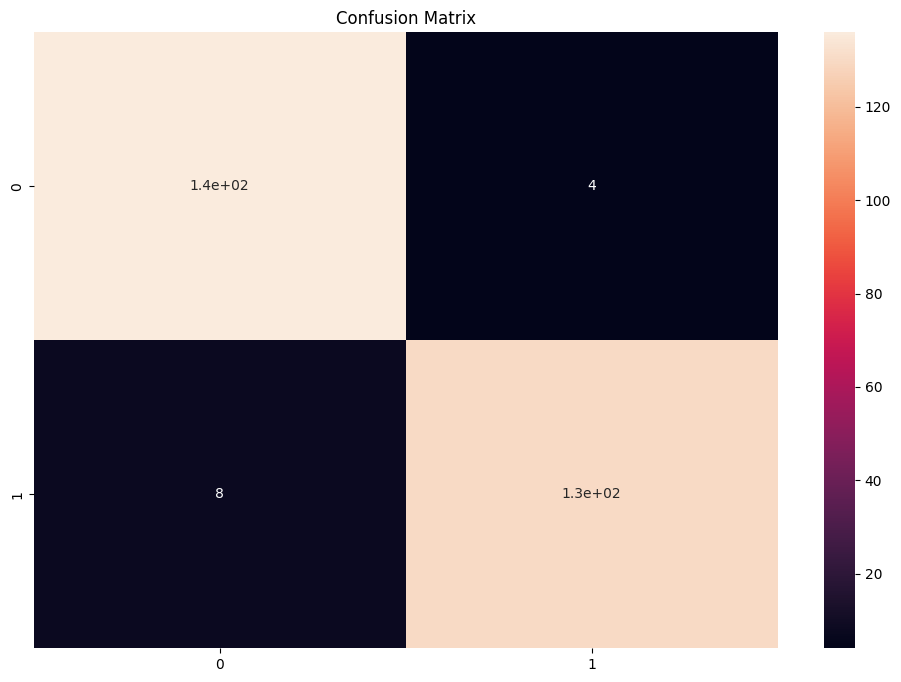

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

In [ ]:
#The function take model and message as parameter
def classify_message(model,message):

    #We will treat message as a paragraphs containing multiple sentences(lines)
    #we will extract individual lines
    for sentences in message:
        sentences=nltk.sent_tokenize(message)

        #Iterate over individual sentences
        for sentence in sentences:
            #replace all special characters
            words=re.sub("[^a-zA-Z]"," ",sentence)

            #perform word tokenization of all non-english-stopwords
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)

    #perform one_hot on tokenized word
    oneHot=[one_hot(word,n=vocab_size)]

    #create an embedded documnet using pad_sequences
    #this can be fed to our model
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    #predict the text using model
    print(text)
    predict=model.predict(text)
    print(predict)
    #if predict value is greater than 0.5 its a spam
    if predict>0.5:
        print("It is a spam")
    #else the message is not a spam
    else:
        print("It is not a spam")


In [ ]:
message1="I am having a bad day and I would like to have a break today"
message2="Exciting prizes on your first loan worth Rs 5000"

In [ ]:
classify_message(model,message2)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 2252 5426 64

In [ ]:
!pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
